In [5]:
# Inclusion Of Required Libraries

# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/SAMSUNG/Desktop/example"))

# Any results you write to the current directory are saved as output.

['BreadBasket_DMS.csv', 'sharing bike demand', 'titanic', 'vscode']


날짜: 트랜잭션의 날짜를 알려주는 범주형 변수입니다(YYYY-MM-DD 형식). 이 열에는 2011년 30월 10일부터 2014년 09월 7일까지의 날짜가 포함됩니다.

시간: 트랜잭션의 시간을 알려주는 범주형 변수입니다(HH:MM:SS 형식).

트랜잭션: 트랜잭션을 구분할 수 있는 정량적 변수입니다. 이 필드에서 동일한 값을 공유하는 행은 동일한 트랜잭션에 속하므로 데이터 집합이 관측치보다 트랜잭션이 적습니다.

항목: 제품의 범주형 변수입니다.

In [6]:
data = pd.read_csv('C:/Users/SAMSUNG/Desktop/example/BreadBasket_DMS.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 415.9+ KB


In [10]:
data.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

In [24]:
print("List of Items sold at the Bakery:")
print("Total Items: ",len(data.Item.unique()))
print("-"*15)
for i in data.Item.unique():
    print(i)


List of Items sold at the Bakery:
Total Items:  95
---------------
Bread
Scandinavian
Hot chocolate
Jam
Cookies
Muffin
Coffee
Pastry
Medialuna
Tea
NONE
Tartine
Basket
Mineral water
Farm House
Fudge
Juice
Ella's Kitchen Pouches
Victorian Sponge
Frittata
Hearty & Seasonal
Soup
Pick and Mix Bowls
Smoothies
Cake
Mighty Protein
Chicken sand
Coke
My-5 Fruit Shoot
Focaccia
Sandwich
Alfajores
Eggs
Brownie
Dulce de Leche
Honey
The BART
Granola
Fairy Doors
Empanadas
Keeping It Local
Art Tray
Bowl Nic Pitt
Bread Pudding
Adjustment
Truffles
Chimichurri Oil
Bacon
Spread
Kids biscuit
Siblings
Caramel bites
Jammie Dodgers
Tiffin
Olum & polenta
Polenta
The Nomad
Hack the stack
Bakewell
Lemon and coconut
Toast
Scone
Crepes
Vegan mincepie
Bare Popcorn
Muesli
Crisps
Pintxos
Gingerbread syrup
Panatone
Brioche and salami
Afternoon with the baker
Salad
Chicken Stew
Spanish Brunch
Raspberry shortbread sandwich
Extra Salami or Feta
Duck egg
Baguette
Valentine's card
Tshirt
Vegan Feast
Postcard
Nomad bag
Choco

In [27]:
data.describe(include='all')

,Date,Time,Transaction,Item
count,21293,21293,21293.000000,21293
unique,159,8240,NaN,95
top,2017-02-04,12:07:39,NaN,Coffee
freq,302,16,NaN,5471
mean,NaN,NaN,4951.990889,NaN
std,NaN,NaN,2787.758400,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2548.000000,NaN
50%,NaN,NaN,5067.000000,NaN
75%,NaN,NaN,7329.000000,NaN


In [28]:
len(data.loc[data["Item"] == "NONE",:])

786

In [33]:
data.loc[data["Item"] == "NONE",:].head(10)

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
85,2016-10-30,11:55:51,40,NONE
126,2016-10-30,13:02:04,59,NONE
140,2016-10-30,13:37:25,65,NONE
149,2016-10-30,13:46:48,67,NONE
167,2016-10-30,14:32:26,75,NONE


In [34]:
data.loc[data["Item"] == "NONE",:].tail(10)

,Date,Time,Transaction,Item
20919,2017-04-07,08:57:19,9507,NONE
20964,2017-04-07,13:06:01,9529,NONE
21010,2017-04-07,17:30:07,9550,NONE
21077,2017-04-08,10:44:44,9579,NONE
21080,2017-04-08,10:48:43,9580,NONE
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE
21266,2017-04-09,12:31:28,9672,NONE


In [41]:
data["Item"].value_counts().head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

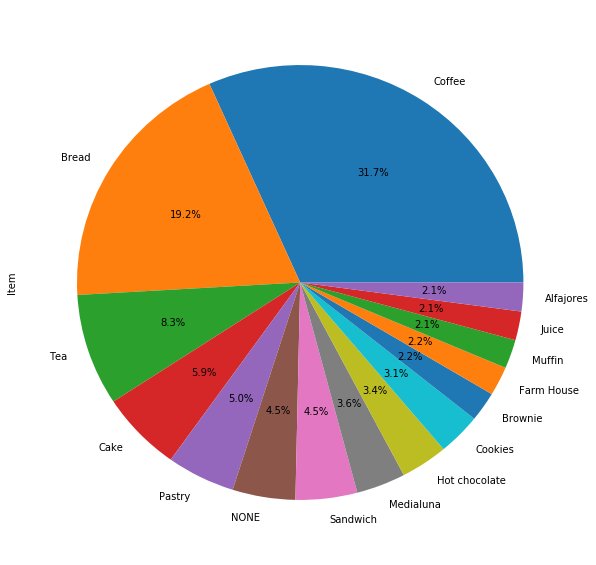

In [42]:
# Pie Chart
plt.figure(1, figsize=(10,10))
data['Item'].value_counts().head(15).plot.pie(autopct="%1.1f%%")
plt.show()

In [44]:
itemNames = data['Item'].value_counts().index
itemValues = data['Item'].value_counts().values

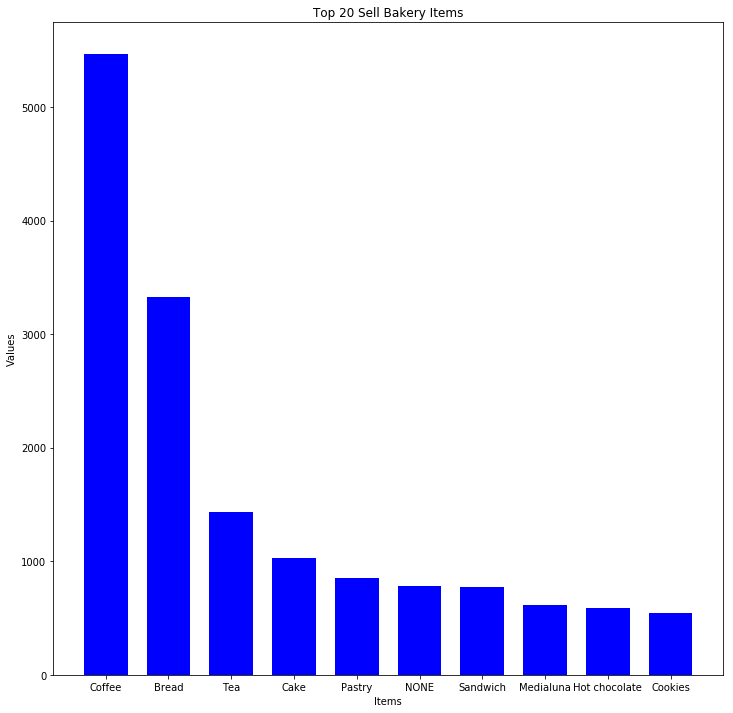

In [45]:
plt.figure(figsize=(12,12))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('Top 20 Sell Bakery Items')
plt.bar(itemNames[:10],itemValues[:10], width = 0.7, color="blue",linewidth=0.4)
plt.show()

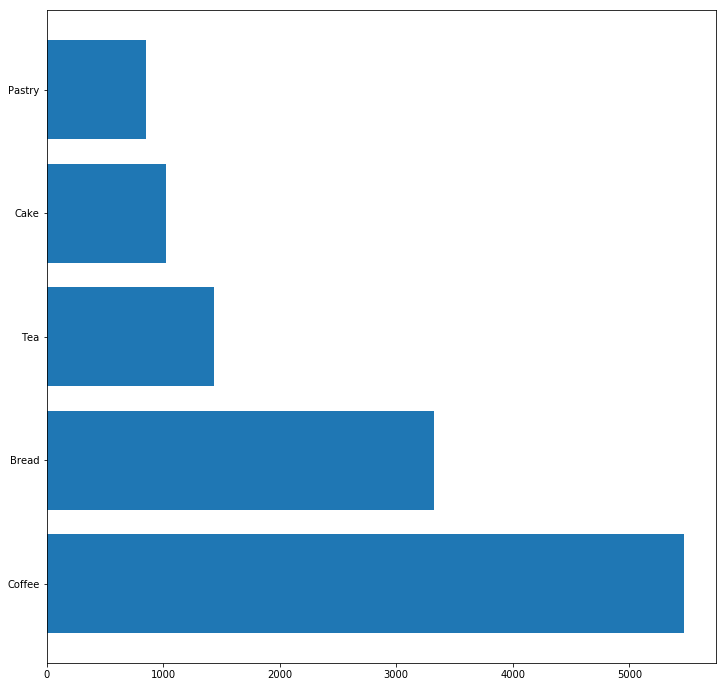

In [46]:
fig, ax = plt.subplots(figsize=(12,12))
plt.style.use('fivethirtyeight')
ax.barh(itemNames[:5], itemValues[:5])
plt.show()

In [47]:
firstMorning = data.loc[(data['Time']>='06:00:00')&(data['Time']<'09:00:00')]
secondMorning = data.loc[(data['Time']>='09:00:00')&(data['Time']<'12:00:00')]
firstAfternoon = data.loc[(data['Time']>='12:00:00')&(data['Time']<'15:00:00')]
secondAfternoon = data.loc[(data['Time']>='15:00:00')&(data['Time']<'18:00:00')]
night = data.loc[(data['Time']>='18:00:00')&(data['Time']<'21:00:00')]

hourlySales = {'firstMorning': len(firstMorning), 'secondMorning': len(secondMorning), 
               'firstAfternoon': len(firstAfternoon),'secondAfternoon': len(secondAfternoon),
               'night': len(night)}

print("This is night sales: ", hourlySales['night'])

This is night sales:  152


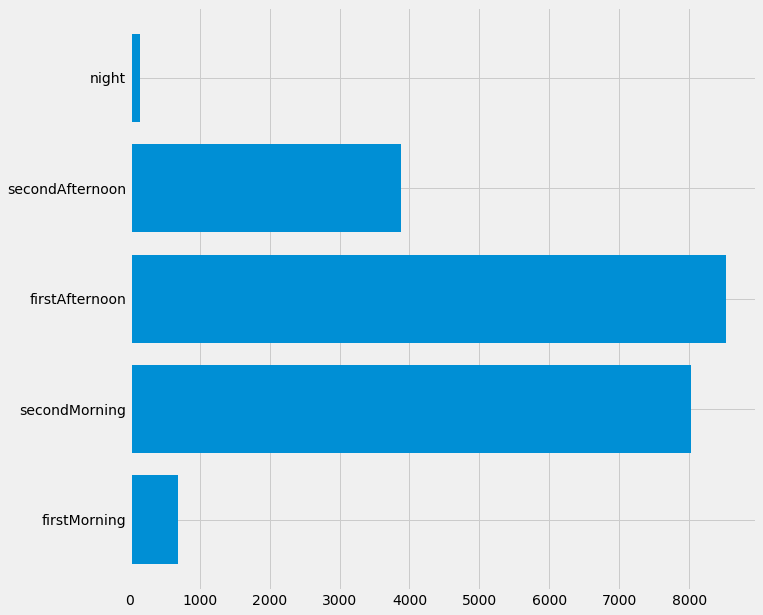

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(list(hourlySales.keys()), list(hourlySales.values()), align='center')

plt.show()

In [80]:
print(firstMorning['Item'].value_counts().head(15))

Coffee           212
Bread            173
Pastry            59
Medialuna         49
NONE              25
Toast             24
Tea               21
Farm House        13
Cookies           12
Hot chocolate      9
Baguette           8
Cake               8
Jam                7
Scandinavian       6
Scone              6
Name: Item, dtype: int64


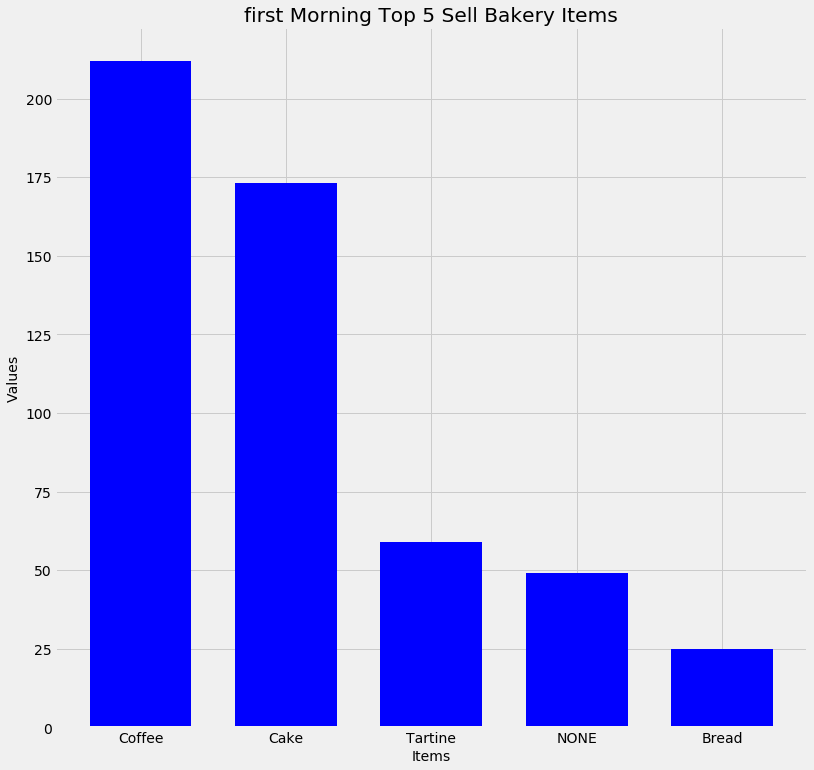

In [83]:
# Bar Plot
plt.figure(figsize=(12,12))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('first Morning Top 5 Sell Bakery Items')
plt.bar(firstMorning['Item'][:5],firstMorning['Item'].value_counts()[:5], width = 0.7, color="blue",linewidth=0.4)
plt.show()